In [ ]:
#Fig 4A

ConversionError: Failed to convert value(s) to axis units: ''

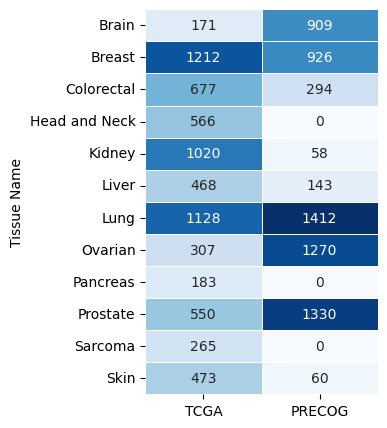

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the datasets
precog_file = os.path.expanduser("C:/Users/HP/Downloads/precog_data_info (1).csv")
tcga_file = os.path.expanduser("C:/Users/HP/Downloads/tcga_non_os (1).csv")
precog_data = pd.read_csv(precog_file)
tcga_data = pd.read_csv(tcga_file)

# Combine TCGA counts by tissue name, summing duplicates
tcga_counts = tcga_data.groupby("Tissue Name")["Count"].sum().reset_index()

# Prepare PRECOG counts, filling in missing cancers with 0
precog_counts = precog_data[["Tissue Name", "Count"]].copy()
all_tissues = sorted(set(tcga_counts["Tissue Name"]).union(set(precog_counts["Tissue Name"])))
precog_counts = precog_counts.set_index("Tissue Name").reindex(all_tissues, fill_value=0).reset_index()

# Align TCGA data to the same tissue order
tcga_counts = tcga_counts.set_index("Tissue Name").reindex(all_tissues, fill_value=0).reset_index()

# Create a combined dataframe for the heatmap
heatmap_data = pd.DataFrame({
    "Tissue Name": all_tissues,
    "TCGA": tcga_counts["Count"],
    "PRECOG": precog_counts["Count"]
})

# Prepare the heatmap data matrix
heatmap_matrix = heatmap_data.set_index("Tissue Name")

# Plot the heatmap
plt.figure(figsize=(3, 5))
sns.heatmap(
    heatmap_matrix,
    annot=True,  # Display the values within the heatmap
    fmt=".0f",   # Format values as integers
    cmap="Blues",  # Custom color map
    linewidths=0.5,
    cbar=False  # Remove the color bar
)

# Customization
plt.xticks("", fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.xlabel("", fontsize=14)
plt.ylabel("", fontsize=14)

# Save and show the plot

plt.show()


In [ ]:
#Fig 4B 

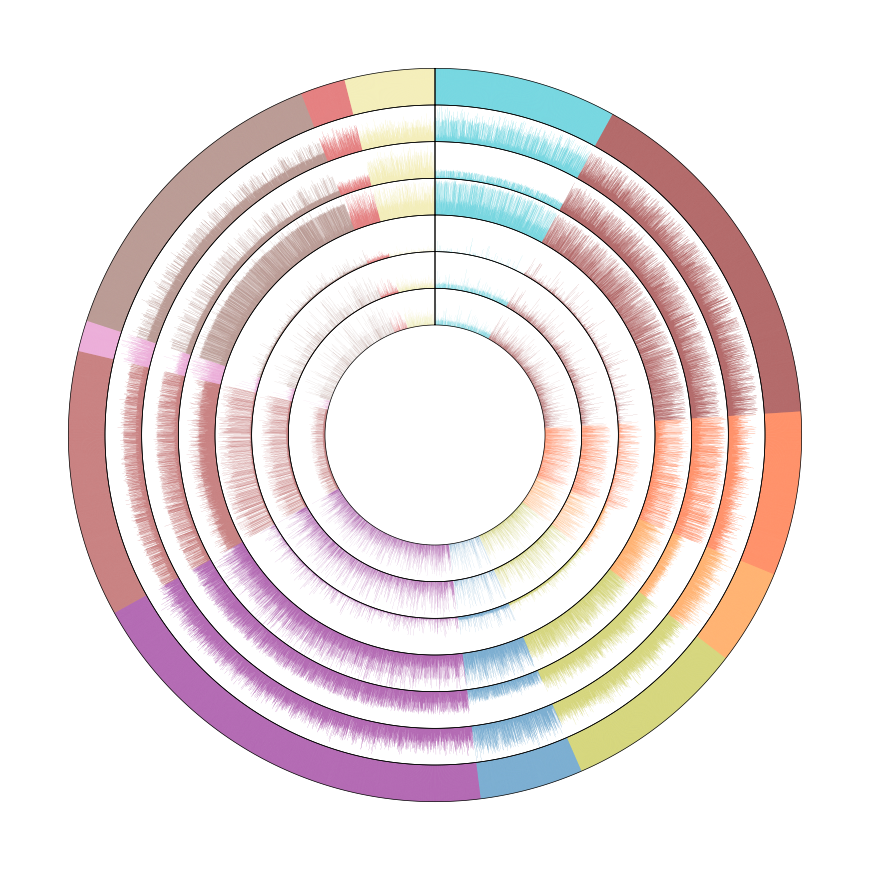

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pycirclize import Circos


df = pd.read_csv("C:\\Users\\HP\\Downloads\\tcga_freq_data.csv", index_col=0)
df = df[[col for col in df.columns if col != 'Cancer'] + ['Cancer']]
df = df[~df.index.duplicated(keep='first')]

df2 = pd.read_csv("C:\\Users\\HP\\Downloads\\precog_freq_data.csv", index_col=0)
df2 = df2[[col for col in df2.columns if col != 'Cancer'] + ['Cancer']]
df2 = df2[~df2.index.duplicated(keep='first')]

immune_cells = ['Macrophages.M2', 'Mast.cells.resting', 'MDSC', 'Macrophages.M0',
                'Plasma.cells', 'Monocytes', 'Neutrophils', 'Dendritic.cells.resting',
                'NK.cells.activated', 'T.cells.CD4.memory.resting', 'T.cells.gamma.delta',
                'T.cells.CD8', 'Eosinophils', 'T.cells.CD4.naive', 'T.cells.regulatory..Tregs.',
                'Mast.cells.activated', 'T.cells.follicular.helper', 'Macrophages.M1',
                'B.cells.memory', 'NK.cells.resting', 'B.cells.naive', 
                'T.cells.CD4.memory.activated', 'Dendritic.cells.activated']

stromal_cells = ['Endothelial', 'Fibroblast', 'Epithelial']

tcga_to_tissue = {
    'KIRC': 'Kidney',
    'COADREAD': 'Colorectal',
    'OV': 'Ovarian',
    'SKCM': 'Skin',
    'PAAD': 'Pancreas',
    'KIRP': 'Kidney',
    'GBM': 'Brain',
    'KICH': 'Kidney',
    'CHOL': 'Liver',
    'PRAD': 'Prostate',
    'HNSC': 'Head and Neck',
    'LIHC': 'Liver',
    'LUAD': 'Lung',
    'BRCA': 'Breast',
    'LUSC': 'Lung',
    'SARC': 'Sarcoma',
}

df3 = pd.concat([df, df2], axis=0)
df3['Immune'] = df3[immune_cells].sum(axis=1, skipna=True)
df3['Stromal'] = df3[stromal_cells].sum(axis=1, skipna=True)
df3['rest'] = [1 for i in range(df3.shape[0])]
df3 = df3[['rest', 'Immune', 'Stromal', 'Malignant', 'Unipotent', 'Multipotent', 'Pluripotent', 'Cancer']]
df3['cancer'] = df3['Cancer'].map(tcga_to_tissue).fillna(df3['Cancer'])
df3 = df3.drop(columns=['Cancer']).sample(frac=1).sort_values(by='cancer')


import random
available_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#9b59b6', '#ff6347', '#2e8b57', '#add8e6', '#f0e68c', '#20b2aa', '#f4a460', '#ff1493', '#800080', '#ffd700',
    '#ff4500', '#adff2f', '#00bfff', '#ff1493', '#8b008b', '#800000', '#a52a2a', '#ffff00', '#32cd32', '#ff8c00'
]
random.shuffle(available_colors)
category_colors = {value: color for value, color in zip(df3['cancer'].unique(), available_colors)}

column_color = {'Immune': '#1f77b4',
 'Stromal': '#9b59b6',
 'Malignant': '#8b008b',
 'Unipotent': '#800000',
 'Multipotent': '#e377c2',
 'Pluripotent': '#8c564b'}


def create_legend_image(legend_dict, output_file="legend_image.png"):
    # Create a blank figure
    fig, ax = plt.subplots(figsize=(4, len(legend_dict) * 0.5))
    
    # Hide axes
    ax.axis('off')
    
    # Add legend entries
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label=key, markerfacecolor=value, markersize=20)
        for key, value in legend_dict.items()
    ]
    
    ax.legend(
        handles=legend_elements, 
        loc='center', 
        frameon=False, 
        fontsize=20
    )
    
    # Save the legend as an image
    plt.savefig(output_file, bbox_inches='tight', dpi=1200)
    plt.close(fig)

# Create the legend image
create_legend_image(category_colors, output_file="legend_image.png")

circos = Circos(sectors={"Sector": df3.shape[0]}, space=0)  # One sector, multiple tracks


for i, col in enumerate(df3.columns[:-1], start=1):
    # Create a new track for each feature
    track = circos.sectors[0].add_track((100 - i * 10, 100 - (i - 1) * 10), r_pad_ratio=0.0)
    track.axis()
    
    # Plot bar plot for the current feature
    x = np.arange(df3.shape[0]) + 0.5  # Center x positions
    y = df3[col].values
    bar_colors = [category_colors[cat] for cat in df3['cancer']]
    track.bar(x, y, color=bar_colors)

# Display plot
fig = circos.plotfig()
plt.savefig('circos_all1.png', dpi=1200, bbox_inches='tight')
plt.show()

In [ ]:
#Fig 4C

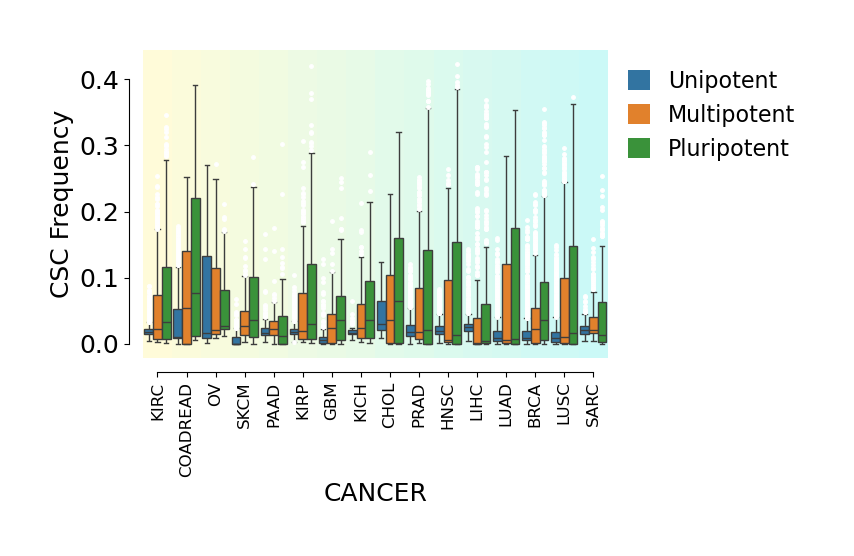

In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

tcga_freq = pd.read_csv("C:\\Users\\HP\\Downloads\\tcga_freq_data.csv", index_col=(0))
tcga_freq = tcga_freq[['Unipotent', 'Multipotent', 'Pluripotent', 'Cancer']]
tcga_freq = pd.melt(tcga_freq, id_vars=['Cancer'], value_vars=['Unipotent', 'Multipotent', 'Pluripotent'], 
                   var_name='Stem', value_name='CSC Frequency')

from matplotlib.colors import LinearSegmentedColormap


# Create custom colormaps
low = (np.array([255, 244, 132]) / 255).tolist()  # Light yellow
high = (np.array([84, 236, 231]) / 255).tolist()  # Cyan
colors = [low, high]

# Generate a gradient colormap
cm_gradient = LinearSegmentedColormap.from_list("CustomGradient", colors, N=36)

# Example data

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))

# Define gradient background
num_labels = 16
for i in range(num_labels):
    color = cm_gradient(i / (num_labels - 1))  # Get color for each label
    ax.axvspan(i - 0.5, i + 0.5, color=color, alpha=0.3, zorder=0)


flierprops = dict(marker='.', markerfacecolor='white', markeredgecolor='white', markersize=5, linestyle='none')

sns.boxplot(data=tcga_freq, x='Cancer', y='CSC Frequency', hue='Stem', width=0.9, flierprops=flierprops,
            hue_order=['Unipotent', 'Multipotent', 'Pluripotent'], ax=ax)
sns.despine(right=True, top=True, offset=10, trim=True)
plt.xticks(rotation=90, fontsize=12)  # Increase x tick label size
plt.yticks(fontsize=18)               # Increase y tick label size

# Label axes with larger font size
plt.xlabel('CANCER', fontsize=18)
plt.ylabel('CSC Frequency', fontsize=18)

# Move legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=16)
# plt.savefig('scentropy_score_img.png', dpi=1200, bbox_inches='tight')

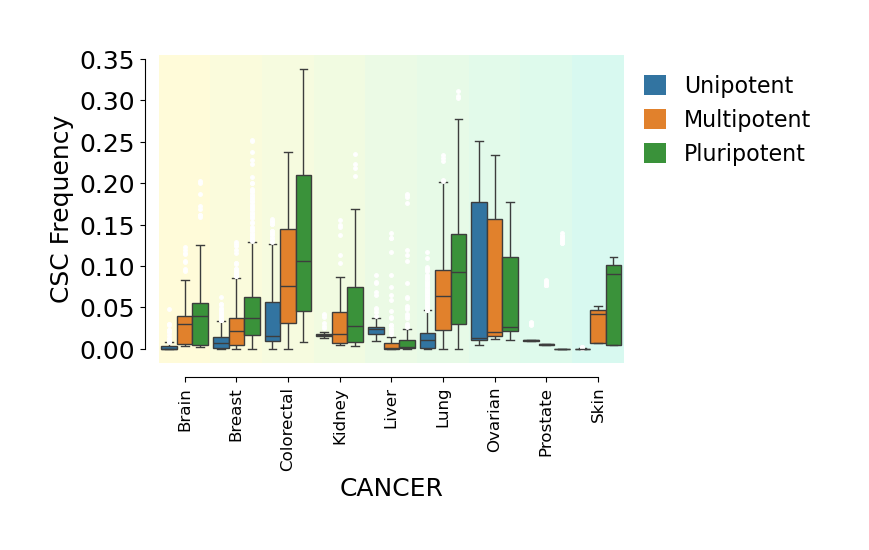

In [22]:
precog_freq = pd.read_csv("C:\\Users\\HP\\Downloads\\precog_freq_data.csv", index_col=(0))
precog_freq = precog_freq[['Unipotent', 'Multipotent', 'Pluripotent', 'Cancer']]
precog_freq = pd.melt(precog_freq, id_vars=['Cancer'], value_vars=['Unipotent', 'Multipotent', 'Pluripotent'], 
                   var_name='Stem', value_name='CSC Frequency')

from matplotlib.colors import LinearSegmentedColormap


# Create custom colormaps
low = (np.array([255, 244, 132]) / 255).tolist()  # Light yellow
high = (np.array([84, 236, 231]) / 255).tolist()  # Cyan
colors = [low, high]

# Generate a gradient colormap
cm_gradient = LinearSegmentedColormap.from_list("CustomGradient", colors, N=36)

# Example data

# Create the plot
fig, ax = plt.subplots(figsize=(6, 4))

# Define gradient background
num_labels = 12
for i in range(num_labels):
    color = cm_gradient(i / (num_labels - 1))  # Get color for each label
    ax.axvspan(i - 0.5, i + 0.5, color=color, alpha=0.3, zorder=0)


flierprops = dict(marker='.', markerfacecolor='white', markeredgecolor='white', markersize=5, linestyle='none')

sns.boxplot(data=precog_freq, x='Cancer', y='CSC Frequency', hue='Stem', width=0.9, flierprops=flierprops,
            hue_order=['Unipotent', 'Multipotent', 'Pluripotent'], ax=ax)
sns.despine(right=True, top=True, offset=10, trim=True)
plt.xticks(rotation=90, fontsize=12)  # Increase x tick label size
plt.yticks(fontsize=18)               # Increase y tick label size

# Label axes with larger font size
plt.xlabel('CANCER', fontsize=18)
plt.ylabel('CSC Frequency', fontsize=18)

# Move legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=16)
# plt.savefig('scentropy_score_img.png', dpi=1200, bbox_inches='tight')

In [ ]:
#Fig 4D

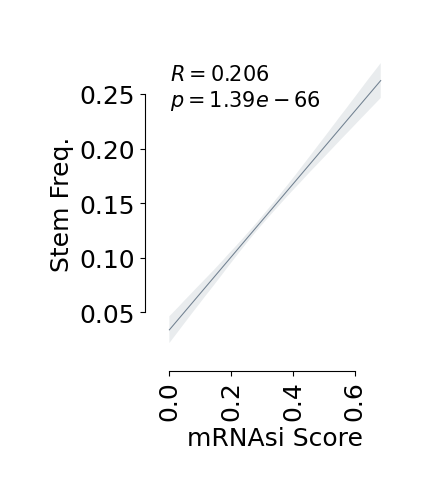

In [23]:
stem = pd.read_csv("C:\\Users\\HP\\Downloads\\tcga_mrnasi.csv", index_col=0)
stem.index = stem.index.str[:15]
stem = stem[~stem.index.duplicated(keep='first')]
stem = stem[['mRNAsi']]

tcga_freq = pd.read_csv("C:\\Users\\HP\\Downloads\\tcga_freq_data.csv", index_col=(0)).sort_index()
tcga_freq = tcga_freq[~tcga_freq.index.duplicated(keep='first')]
tcga_freq['sum'] = tcga_freq[['Unipotent', 'Multipotent', 'Pluripotent']].sum(axis=1)
tcga_freq = tcga_freq[['sum']]

stem_sum = pd.concat([stem, tcga_freq], axis=1).dropna()

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'stem_sum' is your DataFrame
# Linear regression calculation
result = linregress(stem_sum['mRNAsi'], stem_sum['sum'])

# Extract the regression values
r_value = result.rvalue  # Correlation coefficient
p_value = result.pvalue  # p-value
slope = result.slope     # Slope
intercept = result.intercept  # Intercept
r_squared = r_value  # Coefficient of determination

plt.figure(figsize=(3, 4))
# Plot using sns.regplot
sns.regplot(data=stem_sum, x='mRNAsi', y='sum', scatter=False, line_kws={'color': 'slategray'})

# Annotate the plot with R^2 and p-value
plt.text(0.05, 0.95, f'$R = {r_squared:.3f}$\n$p = {p_value:.3g}$',
         transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')
sns.despine(right=True, top=True, offset=10, trim=True)
plt.xticks(rotation=90, fontsize=18)  # Increase x tick label size
plt.yticks(fontsize=18)
# Show the plot
plt.xlabel('mRNAsi Score', fontsize=18)
plt.ylabel('Stem Freq.', fontsize=18)
# plt.title('Linear Regression')
# plt.savefig('tcga_mrnasi.png', dpi=1200, bbox_inches='tight')
plt.show()

In [ ]:
#Fig 4E 

C:\Users\HP\AppData\Local\Temp\ipykernel_130848\687937882.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


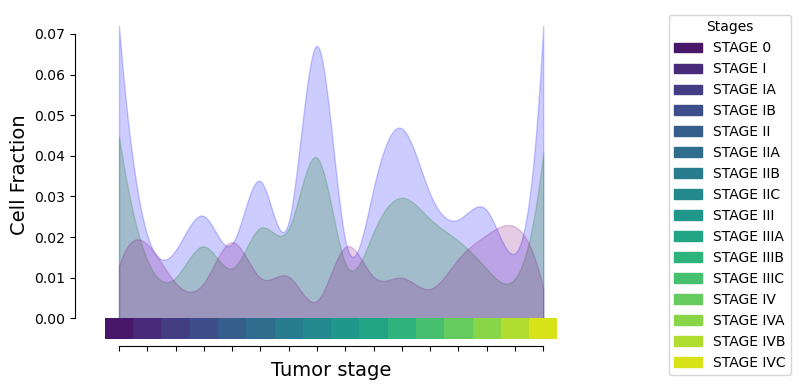

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.patches import Patch

# Load the dataset
file_path = 'C:/Users/HP/Downloads/stage_data.csv'  # Replace with the actual path
df = pd.read_csv(file_path)

# Filter out rows where stage is 'STAGE X' or 'STAGE I/II (NOS)'
df = df[~df['AJCC_PATHOLOGIC_TUMOR_STAGE'].isin(['STAGE X', 'STAGE I/II (NOS)'])]

# Define cell types and color map
cell_types = ["Pluripotent", "Multipotent", "Unipotent"]
colors = {"Pluripotent": "blue", "Multipotent": "green", "Unipotent": "purple"}

# Group data by tumor stages and calculate median fractions per stage
df_grouped = df.groupby("AJCC_PATHOLOGIC_TUMOR_STAGE")[cell_types].median().reset_index()

# Convert tumor stages to a categorical variable for ordering
stages = sorted(df_grouped['AJCC_PATHOLOGIC_TUMOR_STAGE'].unique())
df_grouped['AJCC_PATHOLOGIC_TUMOR_STAGE'] = pd.Categorical(df_grouped['AJCC_PATHOLOGIC_TUMOR_STAGE'], categories=stages, ordered=True)

# Define colors for stages using 'tab20' palette
stage_colors = sns.color_palette("viridis", len(stages))

# Create plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot each cell type with smoothed lines and shaded areas
x_ticks = np.arange(len(stages))
for cell_type in cell_types:
    x = x_ticks
    y = df_grouped[cell_type].values
    
    # Smooth curve using spline interpolation
    x_smooth = np.linspace(x.min(), x.max(), 300)
    y_smooth = make_interp_spline(x, y, k=3)(x_smooth)
    
    # Plot line and shaded area
    #ax.plot(x_smooth, y_smooth, label=cell_type, color=colors[cell_type])
    ax.fill_between(x_smooth, y_smooth, alpha=0.2, color=colors[cell_type])

# Remove x-axis labels
ax.set_xticks(x_ticks)
ax.set_xticklabels([])
sns.despine(right=True, top=True, offset=5, trim=True)

# Add color blocks for each stage along the x-axis
for i, stage in enumerate(stages):
    ax.bar(i, 0.005, width=1, bottom=-0.005, color=stage_colors[i], align='center')#, edgecolor='black')

# Create legends outside the plot
cell_type_legend = [Patch(color=colors[ct], label=ct) for ct in cell_types]
stage_legend = [Patch(color=stage_colors[i], label=stage) for i, stage in enumerate(stages)]

# Position the legends
#plt.legend(handles=cell_type_legend, title="Cell Type", loc="center right", bbox_to_anchor=(1.2, 1))
stage_legend_ax = fig.add_axes([1.2, 0.1, 0.05, 0.8])  # Custom legend axis for stages
stage_legend_ax.legend(handles=stage_legend, title="Stages", loc="center", bbox_to_anchor=(0.5, 0.5))
stage_legend_ax.axis('off')  # Hide axis for the custom legend box

# Customization
ax.set_xlabel("Tumor stage", fontsize=14)
ax.set_ylabel("Cell Fraction", fontsize=14)



plt.tight_layout()

# Show plot
plt.show()


In [ ]:
#Fig 4F ?

C:\Users\HP\AppData\Local\Temp\ipykernel_130848\1725613695.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


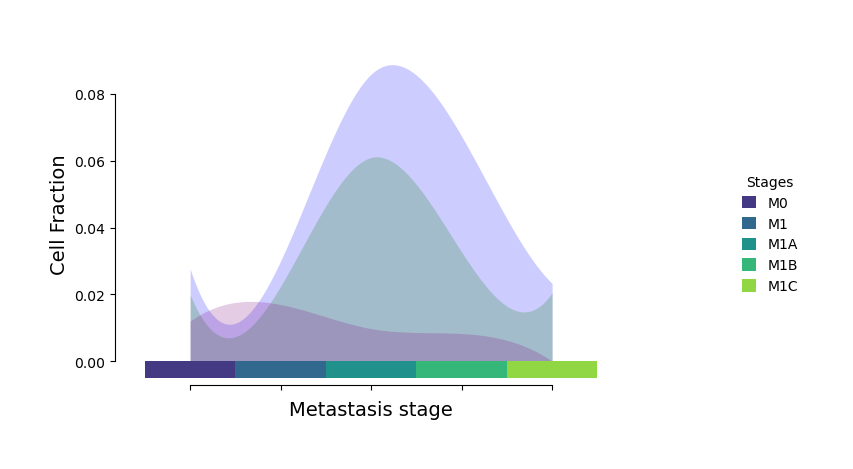

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.patches import Patch

# Load the dataset
file_path = 'C:/Users/HP/Downloads/metastasis_data.csv'  # Replace with the actual path
df = pd.read_csv(file_path)

# Filter out rows where stage is 'STAGE X' or 'STAGE I/II (NOS)'
df = df[~df['PATH_M_STAGE'].isin(['STAGE X', 'STAGE I/II (NOS)', 'CM0 (I+)', 'MX'])]

# Define cell types and color map
cell_types = ["Pluripotent", "Multipotent", "Unipotent"]
colors = {"Pluripotent": "blue", "Multipotent": "green", "Unipotent": "purple"}

# Group data by tumor stages and calculate median fractions per stage
df_grouped = df.groupby("PATH_M_STAGE")[cell_types].median().reset_index()

# Convert tumor stages to a categorical variable for ordering
stages = sorted(df_grouped['PATH_M_STAGE'].unique())
df_grouped['PATH_M_STAGE'] = pd.Categorical(df_grouped['PATH_M_STAGE'], categories=stages, ordered=True)

# Define colors for stages using 'tab20' palette
stage_colors = sns.color_palette("viridis", len(stages))

# Create plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot each cell type with smoothed lines and shaded areas
x_ticks = np.arange(len(stages))
for cell_type in cell_types:
    x = x_ticks
    y = df_grouped[cell_type].values
    
    # Smooth curve using spline interpolation
    x_smooth = np.linspace(x.min(), x.max(), 300)
    y_smooth = make_interp_spline(x, y, k=3)(x_smooth)
    
    # Plot line and shaded area
    #ax.plot(x_smooth, y_smooth, label=cell_type, color=colors[cell_type])
    ax.fill_between(x_smooth, y_smooth, alpha=0.2, color=colors[cell_type])

# Remove x-axis labels
ax.set_xticks(x_ticks)
ax.set_xticklabels([])
sns.despine(right=True, top=True, offset=5, trim=True)

# Add color blocks for each stage along the x-axis
for i, stage in enumerate(stages):
    ax.bar(i, 0.005, width=1, bottom=-0.005, color=stage_colors[i], align='center')#, edgecolor='black')

# Create legends outside the plot
cell_type_legend = [Patch(color=colors[ct], label=ct) for ct in cell_types]
stage_legend = [Patch(color=stage_colors[i], label=stage) for i, stage in enumerate(stages)]

# Position the legends
#plt.legend(handles=cell_type_legend, title="Cell Type", loc="center right", bbox_to_anchor=(1.2, 1))
stage_legend_ax = fig.add_axes([1.2, 0.1, 0.05, 0.8])  # Custom legend axis for stages
stage_legend_ax.legend(handles=stage_legend, title="Stages", loc="center", bbox_to_anchor=(0.5, 0.5))
stage_legend_ax.axis('off')  # Hide axis for the custom legend box

# Customization
ax.set_xlabel("Metastasis stage", fontsize=14)
ax.set_ylabel("Cell Fraction", fontsize=14)



plt.tight_layout()

# Show plot
plt.show()


In [ ]:
#Fig 4G ??

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from matplotlib.patches import Patch

# Load the dataset
file_path = 'C:/Users/HP/Downloads/grade_data.csv'  # Replace with the actual path
df = pd.read_csv(file_path)

# Filter out rows where stage is 'STAGE X' or 'STAGE I/II (NOS)'
df = df[~df['PATH_M_STAGE'].isin(['STAGE X', 'STAGE I/II (NOS)', 'CM0 (I+)', 'MX'])]

# Define cell types and color map
cell_types = ["Pluripotent", "Multipotent", "Unipotent"]
colors = {"Pluripotent": "blue", "Multipotent": "green", "Unipotent": "purple"}

# Group data by tumor stages and calculate median fractions per stage
df_grouped = df.groupby("PATH_M_STAGE")[cell_types].median().reset_index()

# Convert tumor stages to a categorical variable for ordering
stages = sorted(df_grouped['PATH_M_STAGE'].unique())
df_grouped['PATH_M_STAGE'] = pd.Categorical(df_grouped['PATH_M_STAGE'], categories=stages, ordered=True)

# Define colors for stages using 'tab20' palette
stage_colors = sns.color_palette("viridis", len(stages))

# Create plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot each cell type with smoothed lines and shaded areas
x_ticks = np.arange(len(stages))
for cell_type in cell_types:
    x = x_ticks
    y = df_grouped[cell_type].values
    
    # Smooth curve using spline interpolation
    x_smooth = np.linspace(x.min(), x.max(), 300)
    y_smooth = make_interp_spline(x, y, k=3)(x_smooth)
    
    # Plot line and shaded area
    #ax.plot(x_smooth, y_smooth, label=cell_type, color=colors[cell_type])
    ax.fill_between(x_smooth, y_smooth, alpha=0.2, color=colors[cell_type])

# Remove x-axis labels
ax.set_xticks(x_ticks)
ax.set_xticklabels([])
sns.despine(right=True, top=True, offset=5, trim=True)

# Add color blocks for each stage along the x-axis
for i, stage in enumerate(stages):
    ax.bar(i, 0.005, width=1, bottom=-0.005, color=stage_colors[i], align='center')#, edgecolor='black')

# Create legends outside the plot
cell_type_legend = [Patch(color=colors[ct], label=ct) for ct in cell_types]
stage_legend = [Patch(color=stage_colors[i], label=stage) for i, stage in enumerate(stages)]

# Position the legends
#plt.legend(handles=cell_type_legend, title="Cell Type", loc="center right", bbox_to_anchor=(1.2, 1))
stage_legend_ax = fig.add_axes([1.2, 0.1, 0.05, 0.8])  # Custom legend axis for stages
stage_legend_ax.legend(handles=stage_legend, title="Stages", loc="center", bbox_to_anchor=(0.5, 0.5))
stage_legend_ax.axis('off')  # Hide axis for the custom legend box

# Customization
ax.set_xlabel("Metastasis stage", fontsize=14)
ax.set_ylabel("Cell Fraction", fontsize=14)



plt.tight_layout()

# Show plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/HP/Downloads/grade_data.csv'

In [ ]:
#Fig 4H

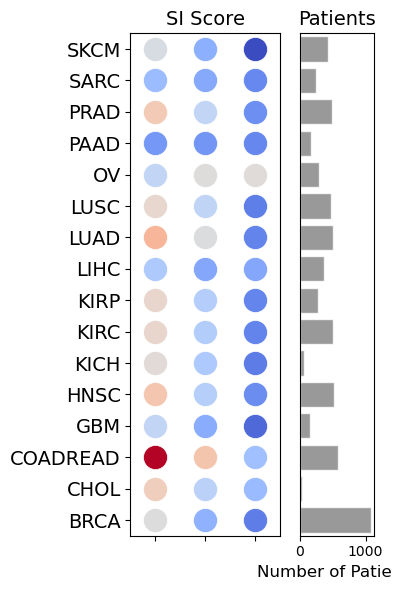

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Define the file path to the SURVIVAL folder
folder_path = r'C:\Users\HP\Downloads\SURVIVAL'

# Load the tcgs_os (1).csv file for the bar plot
tcgs_file_path = os.path.join(folder_path, 'tcga_os (1).csv')
tcgs_data = pd.read_csv(tcgs_file_path)

# Extract cancer names and patient counts
cancer_counts = tcgs_data[['Cancer', 'count']].set_index('Cancer').sort_index()

# List of cancer types for the bubble plot
cancer_types = cancer_counts.index.tolist()

# Initialize a dictionary to store the normalized SIS values for each cancer type
sis_values = {}

# Loop through each cancer type file and calculate normalized SIS values
for cancer in cancer_types:
    file_path = os.path.join(folder_path, f'{cancer}_surv_data.csv')
    data = pd.read_csv(file_path)
    
    # Calculate the normalized SIS for each cell type
    normalized_sis = data[['Pluripotent', 'Multipotent', 'Unipotent']].sum() / len(data)
    
    # Store the normalized SIS values in the dictionary
    sis_values[cancer] = normalized_sis

# Convert the dictionary to a DataFrame
df = pd.DataFrame(sis_values).T

# Set up the figure with two subplots (bubble plot + bar plot)
fig, (ax_bubble, ax_bar) = plt.subplots(
    nrows=1, ncols=2, figsize=(4, 6), gridspec_kw={'width_ratios': [2, 1]}
)

# ---- Bubble Plot ----
# Normalize the SIS values for color mapping
norm = plt.Normalize(df.min().min(), df.max().max())
cmap = plt.cm.coolwarm

# Create the bubble plot
for i, cell_type in enumerate(df.columns):
    for j, cancer in enumerate(df.index):
        ax_bubble.scatter(
            x=i, y=j, 
            s=300,  # Constant bubble size
            color=cmap(norm(df.loc[cancer, cell_type])),  # Color based on value
            edgecolors="w", linewidth=0.5
        )

# Adjust bubble plot limits and labels
ax_bubble.set_xlim(-0.5, len(df.columns) - 0.5)
ax_bubble.set_ylim(-0.5, len(cancer_types) - 0.5)
ax_bubble.set_xticks(np.arange(len(df.columns)))
ax_bubble.set_xticklabels([])  # Remove x-tick labels
ax_bubble.set_yticks(np.arange(len(df.index)))
ax_bubble.set_yticklabels(df.index, fontsize=14)  # Keep y-tick labels
ax_bubble.set_xlabel("")  # Remove x-axis label
ax_bubble.set_title('SI Score', fontsize=14)

# ---- Bar Plot ----
cancer_counts = cancer_counts.reindex(cancer_types)  # Ensure the same order as the bubble plot
ax_bar.barh(
    y=cancer_counts.index, 
    width=cancer_counts['count'], 
    color='gray', edgecolor='w', alpha=0.8
)
ax_bar.set_xlabel('Number of Patients', fontsize=12)
ax_bar.set_yticks([])  # Remove y-tick labels from bar plot to avoid redundancy
ax_bar.set_title('Patients', fontsize=14)

# Adjust spacing between plots and add padding
plt.subplots_adjust(wspace=0)  # Reduce space between the plots to attach them
ax_bar.set_ylim(-0.5, len(cancer_types) - 0.5)
# Save and show the plot

plt.tight_layout()

# Show the plot
plt.show()


In [4]:
#Fig 4I

Brain: Total rows before zero removal: 909
Brain: Total rows after zero removal: 423
Breast: Total rows before zero removal: 877
Breast: Total rows after zero removal: 548
Colorectal: Total rows before zero removal: 294
Colorectal: Total rows after zero removal: 229
Kidney: Total rows before zero removal: 58
Kidney: Total rows after zero removal: 58
Liver: Total rows before zero removal: 143
Liver: Total rows after zero removal: 60
Lung: Total rows before zero removal: 1412
Lung: Total rows after zero removal: 736
Ovarian: Total rows before zero removal: 1270
Ovarian: Total rows after zero removal: 1270
Prostate: Total rows before zero removal: 140
Prostate: Total rows after zero removal: 140
Skin: Total rows before zero removal: 40
Skin: Total rows after zero removal: 19


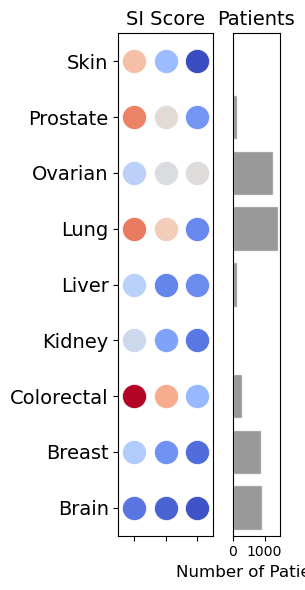

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Define the file path to the SURVIVAL folder
folder_path = r'C:\Users\HP\Downloads\SURVIVAL_PRECOG'

# Load the tcgs_os (1).csv file for the bar plot
tcgs_file_path = os.path.join(folder_path, 'precog_data_info (1).csv')
tcgs_data = pd.read_csv(tcgs_file_path)

# Extract cancer names and patient counts
cancer_counts = tcgs_data[['Cancer', 'count']].set_index('Cancer').sort_index()

# List of cancer types for the bubble plot
cancer_types = cancer_counts.index.tolist()

# Initialize a dictionary to store the normalized SIS values for each cancer type
sis_values = {}

# Loop through each cancer type file and calculate normalized SIS values
for cancer in cancer_types:
    file_path = os.path.join(folder_path, f'{cancer}_surv_data_precog.csv')
    data = pd.read_csv(file_path)
    
    # Print the total rows before filtering
    print(f"{cancer}: Total rows before zero removal: {len(data)}")
    
    # Remove rows that contain any zero in the specified columns
    data_filtered = data[(data[['Pluripotent', 'Multipotent', 'Unipotent']] != 0).all(axis=1)]
    
    # Print the total rows after filtering
    print(f"{cancer}: Total rows after zero removal: {len(data_filtered)}")
    
    # Calculate the normalized SIS for each cell type if data is not empty
    if not data_filtered.empty:
        normalized_sis = data_filtered[['Pluripotent', 'Multipotent', 'Unipotent']].sum() / len(data_filtered)
        sis_values[cancer] = normalized_sis

# Convert the dictionary to a DataFrame
df = pd.DataFrame(sis_values).T


# Set up the figure with two subplots (bubble plot + bar plot)
fig, (ax_bubble, ax_bar) = plt.subplots(
    nrows=1, ncols=2, figsize=(3, 6), gridspec_kw={'width_ratios': [2, 1]}
)

# ---- Bubble Plot ----
# Normalize the SIS values for color mapping
norm = plt.Normalize(df.min().min(), df.max().max())
cmap = plt.cm.coolwarm

# Create the bubble plot
for i, cell_type in enumerate(df.columns):
    for j, cancer in enumerate(df.index):
        ax_bubble.scatter(
            x=i, y=j, 
            s=300,  # Constant bubble size
            color=cmap(norm(df.loc[cancer, cell_type])),  # Color based on value
            edgecolors="w", linewidth=0.5
        )

# Adjust bubble plot limits and labels
ax_bubble.set_xlim(-0.5, len(df.columns) - 0.5)
ax_bubble.set_ylim(-0.5, len(cancer_types) - 0.5)
ax_bubble.set_xticks(np.arange(len(df.columns)))
ax_bubble.set_xticklabels([])  # Remove x-tick labels
ax_bubble.set_yticks(np.arange(len(df.index)))
ax_bubble.set_yticklabels(df.index, fontsize=14)  # Keep y-tick labels
ax_bubble.set_xlabel("")  # Remove x-axis label
ax_bubble.set_title('SI Score', fontsize=14)

# ---- Bar Plot ----
cancer_counts = cancer_counts.reindex(cancer_types)  # Ensure the same order as the bubble plot
ax_bar.barh(
    y=cancer_counts.index, 
    width=cancer_counts['count'], 
    color='gray', edgecolor='w', alpha=0.8
)
ax_bar.set_xlabel('Number of Patients', fontsize=12)
ax_bar.set_yticks([])  # Remove y-tick labels from bar plot to avoid redundancy
ax_bar.set_title('Patients', fontsize=14)

# Adjust spacing between plots and add padding
plt.subplots_adjust(wspace=0)  # Reduce space between the plots to attach them
ax_bar.set_ylim(-0.5, len(cancer_types) - 0.5)
# Save and show the plot

plt.tight_layout()

# Show the plot
plt.show()

In [6]:
#Fig 4J

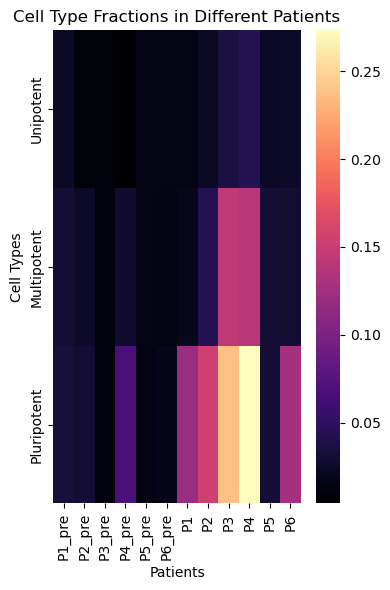

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/HP/Downloads/cell_fracs_Skin_preds_unknown_final_data.csv'
data = pd.read_csv(file_path, index_col=0)  # Use patient names as the index

# Select the relevant columns
columns_to_select = ['Unipotent', 'Multipotent', 'Pluripotent']
data_selected = data[columns_to_select]

# Create the heatmap
plt.figure(figsize=(4, 6))
sns.heatmap(data_selected.T, annot=False, cmap='magma', cbar=True, fmt='.4f', xticklabels=data_selected.index, yticklabels=data_selected.columns)
plt.title('Cell Type Fractions in Different Patients')
plt.xlabel('Patients')
plt.ylabel('Cell Types')


plt.tight_layout()
plt.show()
